In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('bank/bank-full.csv',delimiter=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Análise de missing values

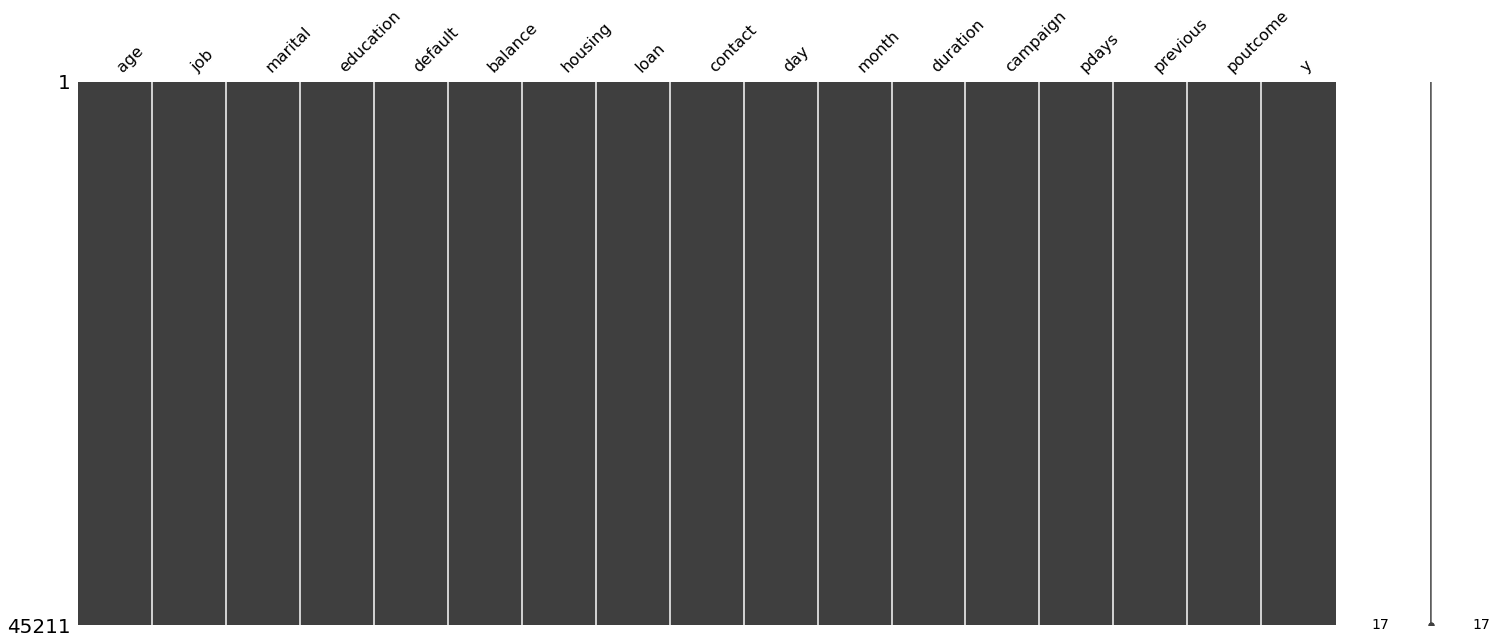

In [8]:
import missingno as msno
msno.matrix(df)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## QUESTÃO 1
### Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

In [133]:
df_loan = pd.DataFrame()
df_loan['yes'] = df[df['loan'] == 'yes']['job'].value_counts()
df_loan['no'] = df[df['loan'] == 'no']['job'].value_counts()
df_loan
# plt.figure(figsize=(17,8))
# df_jobs.plot.bar(title = 'Job and deposit')

,yes,no
blue-collar,1684,8048
technician,1309,6288
management,1253,8205
admin.,991,4180
services,836,3318
entrepreneur,356,1131
retired,309,1955
self-employed,229,1350
housemaid,152,1088
unemployed,109,1194


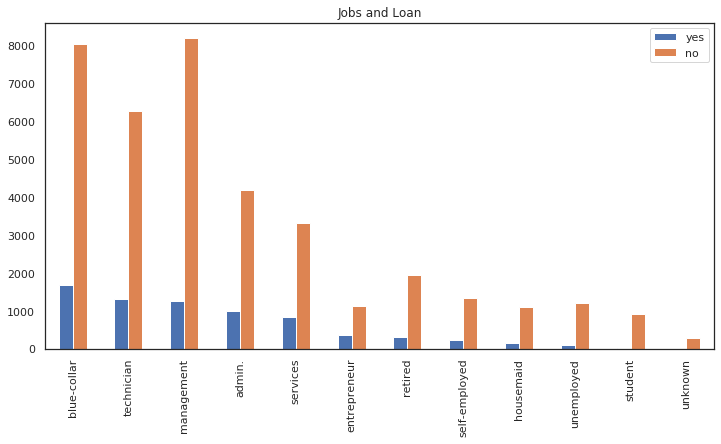

In [137]:
df_loan.plot.bar(title = 'Jobs and Loan',figsize=(12,6))

In [129]:
df_housing = pd.DataFrame()
df_housing['yes'] = df[df['housing'] == 'yes']['job'].value_counts()
df_housing['no'] = df[df['housing'] == 'no']['job'].value_counts()
df_housing

,yes,no
blue-collar,7048,2684
management,4678,4780
technician,4115,3482
admin.,3182,1989
services,2766,1388
entrepreneur,869,618
self-employed,765,814
unemployed,543,760
retired,491,1773
housemaid,398,842


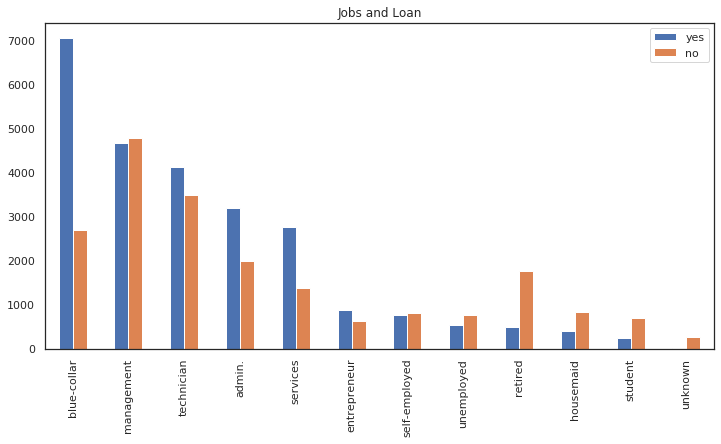

In [138]:
df_housing.plot.bar(title = 'Jobs and Loan',figsize=(12,6))

#### A profissão blue-collar é a que mais tem tendência a fazer um empréstimo, tanto para comprar um imóvel quanto normal

## QUESTÃO 2
### Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

In [140]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Campanha atual

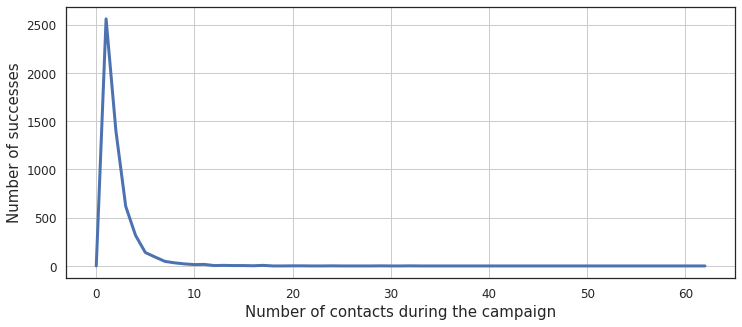

In [245]:
plt.figure(figsize=(12,5))
success = {}
for num in range(0,df['campaign'].max()):
    success[num] = sum(df[df['campaign'] == num]['y'] == 'yes')
plt.plot(list(success.keys()),list(success.values()),linewidth=3)
plt.xlabel('Number of contacts during the campaign', fontsize=15)
plt.ylabel('Number of successes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

In [260]:
df_suc = pd.DataFrame()
df_suc['Succeded'] = success.values()
df_suc['Number of contacts'] = success.keys()
df_suc.sort_values(by='Succeded', ascending=False).head(15)

,Succeded,Number of contacts
1,2561,1
2,1401,2
3,618,3
4,317,4
5,139,5
6,92,6
7,47,7
8,32,8
9,21,9
11,16,11


### Última campanha

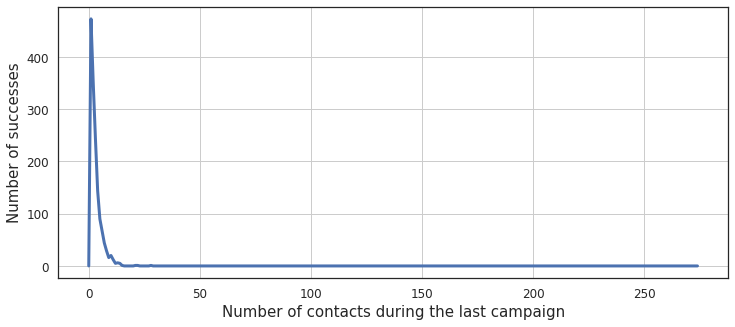

In [270]:
plt.figure(figsize=(12,5))
success = {}
for num in range(0,df['previous'].max()):
    success[num] = sum(df[df['previous'] == num]['poutcome'] == 'success')
plt.plot(list(success.keys()),list(success.values()),linewidth=3)
plt.xlabel('Number of contacts during the last campaign', fontsize=15)
plt.ylabel('Number of successes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

In [271]:
df_lastsuc = pd.DataFrame()
df_lastsuc['Succeded'] = success.values()
df_lastsuc['Number of last contacts'] = success.keys()
df_lastsuc.sort_values(by='Succeded', ascending=False).head(15)

,Succeded,Number of last contacts
1,473,1
2,352,2
3,244,3
4,144,4
5,90,5
6,67,6
7,44,7
8,29,8
10,20,10
9,16,9


#### O número de vezes que o banco entrou em contato não é um fator determinante para o sucesso da campanha, pois o valor de clientes que adquiriram a campanha é máximo é quando o banco entrou em contato somente uma vez

## QUESTÃO 3
### Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

### Entre 1 e 10 ligações

## QUESTÃO 4
### O resultado da campanha anterior tem relevância na campanha atual?

In [272]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [285]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

encoder = preprocessing.LabelEncoder()

In [286]:
df_encoded = df.apply(encoder.fit_transform)

In [288]:
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [289]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [290]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13175
           1       0.64      0.43      0.52      1745

    accuracy                           0.91     14920
   macro avg       0.78      0.70      0.73     14920
weighted avg       0.89      0.91      0.90     14920



[[12755   420]
 [  992   753]]


In [295]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

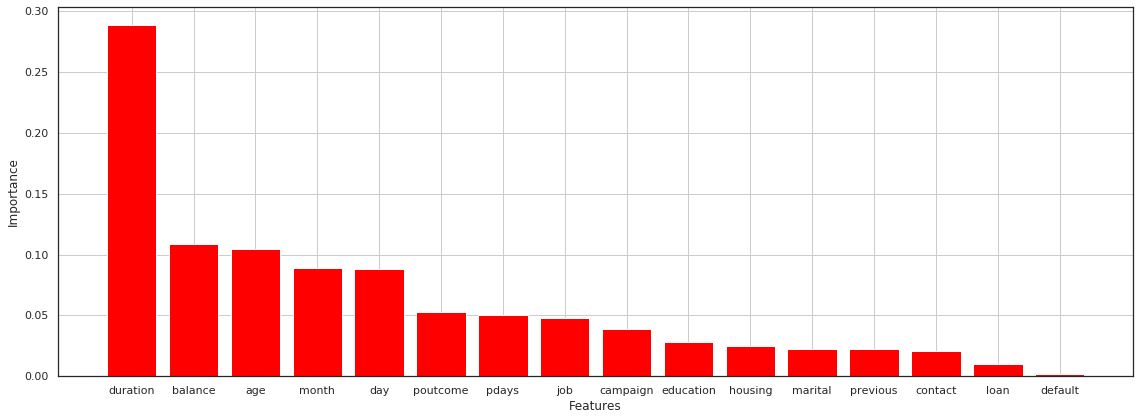

In [308]:
plt.figure(figsize=(16,6))
plt.bar(feature_importances.index, feature_importances['importance'], color='red')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()

### Pode-se ver pela importância relativa de cada feature que o resultado da campanha anterior influenciou o resultado da campanha atual

In [318]:
df_housing = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']].copy()

In [322]:
df_housing[df_housing['housing'] == 'yes']

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
5,35,management,married,tertiary,no,231,yes,no
...,...,...,...,...,...,...,...,...
45191,75,retired,divorced,tertiary,no,3810,yes,no
45194,59,management,married,tertiary,no,138,yes,yes
45197,36,management,single,secondary,no,1511,yes,no
45199,34,blue-collar,single,secondary,no,1475,yes,no


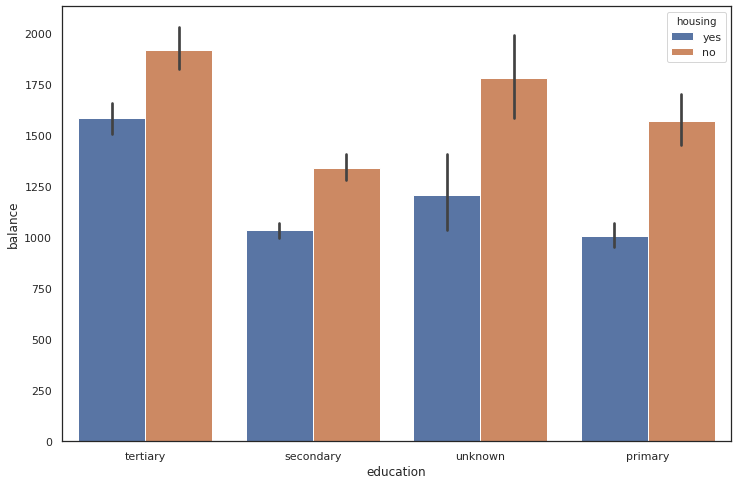

In [343]:
# f, ax = plt.subplots(1,2, figsize=(16,8))
plt.figure(figsize=(12,8))




sns.barplot(x="education", y="balance", hue="housing", data=df)#, estimator=lambda x: len(x) / len(df) * 100)
# # sns.barplot(x="marital", y="age", hue="housing", data=df)
# ax[1].set(ylabel="Balance")
# ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")